# Python Foundations Project: FoodHub Data Analysis

## Problem Statement

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

## Importing necessary libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Function Definition

In [ ]:
# User-defined functions
def set_bin_label_ycountplot(ax, df, cnt_fmt, pct_fmt):
  """
  Description: Function to set the labels (count and percentage) for each bin in a countplot
  Parameters:
    ax: matplotlib.axes._axes.Axes, required
      The Axes() returned by Seaborn countplot()
    df: pandas.core.frame.DataFrame, required
      The DataFrame() of two-dimensional tabular data
    cnt_fmt: str, required
      The format for count label
    pct_fmt: str, required
      The format for percentage label
  """
  for patch in ax.patches:
    x = patch.get_x() + patch.get_width()
    y = patch.get_y() + patch.get_height() / 1.75
    cnt = ('{:' + cnt_fmt + '}').format(patch.get_width())
    pct = ('{:' + pct_fmt + '}%').format(100 * patch.get_width() / len(df))

    ax.annotate((cnt + ' (' + pct + ')'), (x, y))

def set_bin_label_ybarplot(ax, df, cnt_fmt):
  """
  Description: Function to set the label (count) for each bin in a barplot
  Parameters:
    ax: matplotlib.axes._axes.Axes, required
      The Axes() returned by Seaborn countplot()
    df: pandas.core.frame.DataFrame, required
      The DataFrame() of two-dimensional tabular data
    cnt_fmt: str, required
      The format for count label
  """
  for patch in ax.patches:
    x = patch.get_x() + patch.get_width()
    y = patch.get_y() + patch.get_height() / 1.75
    cnt = ('{:' + cnt_fmt + '}').format(patch.get_width())

    ax.annotate(cnt, (x, y))

## Loading the dataset

In [ ]:
# Read the data in Google Drive
df = pd.read_csv('/content/foodhub_order.csv')

## Data Overview

In [ ]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Observations:**
* The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.



### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Display the shape of the DataFrame
df.shape

(1898, 9)

**Observations:**
* The DataFrame has a total of 1,898 rows with 9 columns.



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Display the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations:**
* There are 3 different data types in the data:
  * float (1): cost_of_the_order
  * int64 (4): order_id, customer_id, food_preparation_time, delivery_time
  * object (4): restaurant_name, cuisine_type, day_of_the_week, rating
* The rating column contains numeric values, however, it is being read as a object data type due to the string values 'Not given'.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Display the summary of null values for each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
# Display how many duplicate records are present in the data
df.duplicated().sum()

0

In [ ]:
# Display how many duplicate orders are present in the data
df[df['order_id'].duplicated() == True]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


**Observations:**
* There are no missing or null values in the data
* Also, there are no duplicate records or duplicate orders in the data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Display the statistical summary of all columns in the data
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [ ]:
# Create a list of all categorical columns, as well as numerical columns for additional analysis
cat_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']
num_cols = ['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']

In [ ]:
# Display the count of unique categorical values in each column
for col in cat_cols:
  print(df[col].value_counts())
  print('-' * 50)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------
Not given    736
5        

In [ ]:
# Display the percentage of unique categorical values in each column
for col in cat_cols:
  print(df[col].value_counts(normalize = True).mul(100))
  print('-' * 50)

Shake Shack                  11.538462
The Meatball Shop             6.954689
Blue Ribbon Sushi             6.269758
Blue Ribbon Fried Chicken     5.057956
Parm                          3.582719
                               ...    
Sushi Choshi                  0.052687
Dos Caminos Soho              0.052687
La Follia                     0.052687
Philippe Chow                 0.052687
'wichcraft                    0.052687
Name: restaurant_name, Length: 178, dtype: float64
--------------------------------------------------
American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: cuisine_type, dtype: float64
------------------------------------------

**Observations:**
* Order preparation time ranges from 20 to 35 minutes, with an average preparation time of 27.37 minutes
* Order delivery time ranges from 15 to 33 minutes, with an average delivery time of 24.16 minutes **bold text**
* Order cost ranges from 4.47 to 35.41 dollars, with an average cost of 16.50 dollars.
* A total of 178 restaurants from 14 different cuisines have catered to 1,898 orders of customers.
* About ~38.78% (or 736) of the orders have not been rated by the customers.
* About ~71.18% (or 1,351) of the orders are placed during the weekends.

### **Question 5:** How many orders are not rated?

In [ ]:
# Display the number of ratings
rating_cnt = df.groupby(by = 'rating').size().sort_values(ascending = False).reset_index().rename(columns = {0: 'count'})

rating_cnt

,rating,count
0,Not given,736
1,5,588
2,4,386
3,3,188


In [ ]:
# Display the percentage of ratings
rating_pct = df['rating'].value_counts(normalize = True).mul(100).reset_index().rename(columns = {'rating': 'percentage', 'index': 'rating'})

rating_pct

,rating,percentage
0,Not given,38.777661
1,5,30.979979
2,4,20.337197
3,3,9.905163


In [ ]:
# Display the number of ratings that have not been given
rating_cnt[rating_cnt['rating'] == 'Not given']

,rating,count
0,Not given,736


In [ ]:
# Display the percentage of ratings that have not been given
rating_pct[rating_pct['rating'] == 'Not given']

,rating,percentage
0,Not given,38.777661


**Observations:**
* Out of 1,898 orders, there are 736 (or about ~38.78%) that have not been rated by the customers.


## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

##### Observations on Cost of the Order:

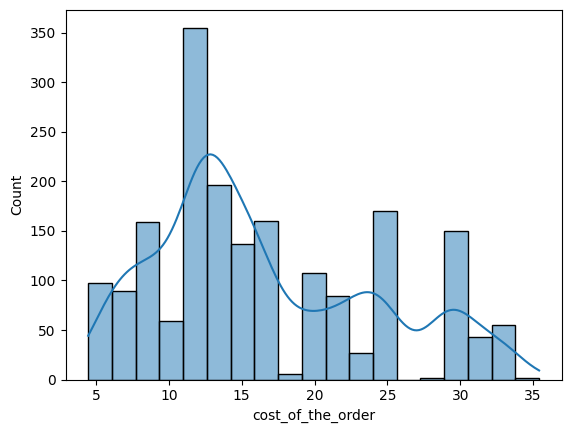

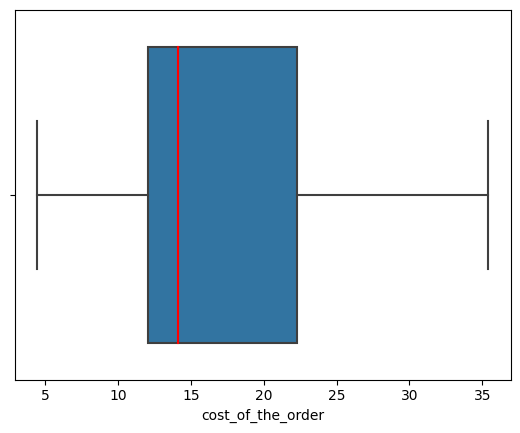

In [ ]:
# Display the distribution of cost_of_the_order
data = df

sns.histplot(data = data, x = 'cost_of_the_order', kde = True)

plt.show()

sns.boxplot(data = data, x = 'cost_of_the_order', medianprops = {'color': 'r'})

plt.show()

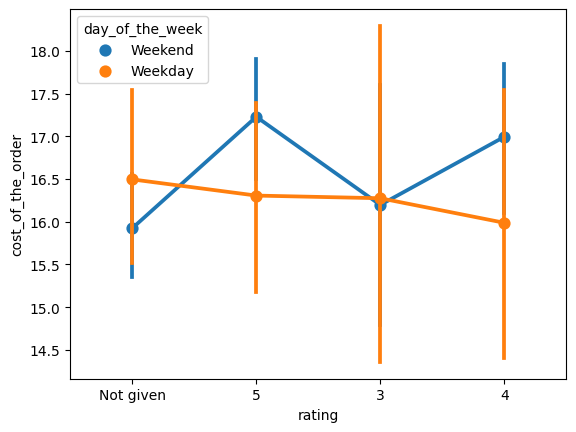

In [ ]:
# Display the distribution of cost_of_the_order for every rating per day_of_the_week
data = df

ax = sns.pointplot(data = data, y = 'cost_of_the_order', x = 'rating', hue = 'day_of_the_week')

plt.show()

**Observations:**
* The distribution is skewed towards right.
* There are no outliers present in this column.
* Median value is around 14 which indicates that most of the Cost of the Order are on the lower side.

##### Observations on Food Preparation Time:

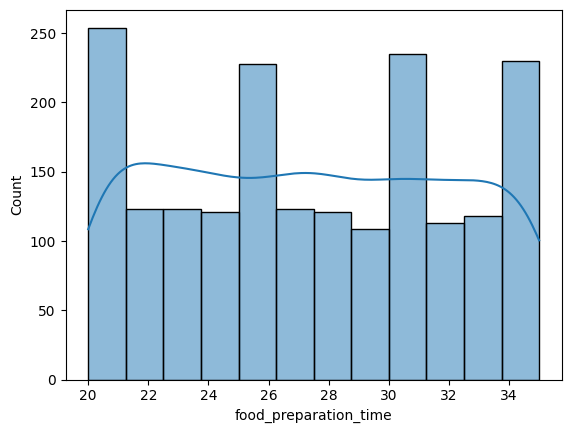

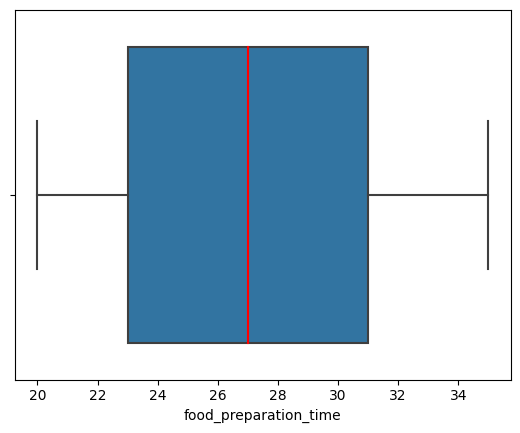

In [ ]:
# Display the distribution of food_preparation_time
data = df

sns.histplot(data = data, x = 'food_preparation_time', kde = True)

plt.show()

sns.boxplot(data = data, x = 'food_preparation_time', medianprops = {'color': 'r'})

plt.show()

**Observations:**
* The column does not have a sharp bell curve and it seems to follow uniform distribution.
* There are no outliers present in this column.
* Median value is around 27 which also indicates it's fairly distributed.

##### Observations on Delivery Time:

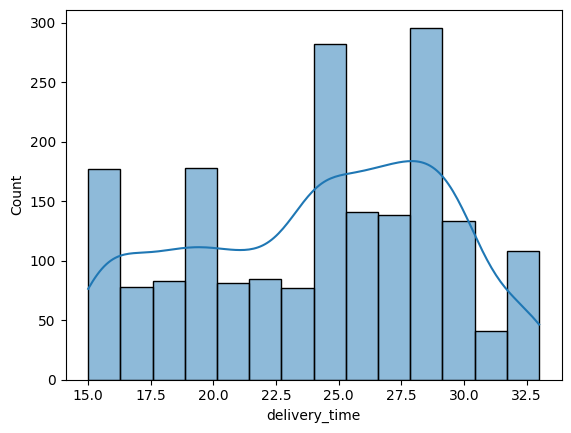

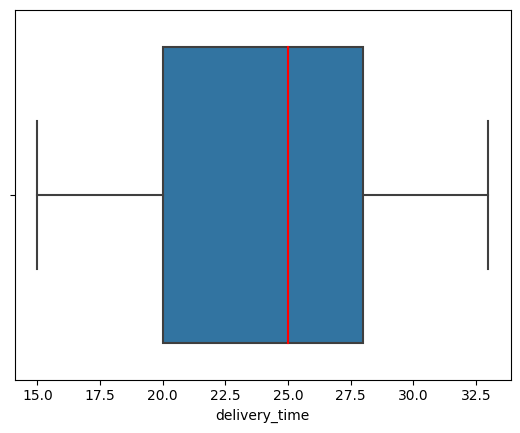

In [ ]:
# Display the distribution of delivery_time
data = df

sns.histplot(data = data, x = 'delivery_time', kde = True)

plt.show()

sns.boxplot(data = data, x = 'delivery_time', medianprops = {'color': 'r'})

plt.show()

**Observations:**
* The distribution is skewed towards left.
* There are no outliers present in this column.

##### Observations on Overall Delivery Time (Food Preparation Time + Delivery Time):

In [ ]:
# Create a column overall_order_time for the total time it took to prepare and deliver the order (food_preparation_time + delivery_time)
df['overall_order_time'] = df['food_preparation_time'] + df['delivery_time']
df['overall_order_time'] = df['overall_order_time'].astype(int)

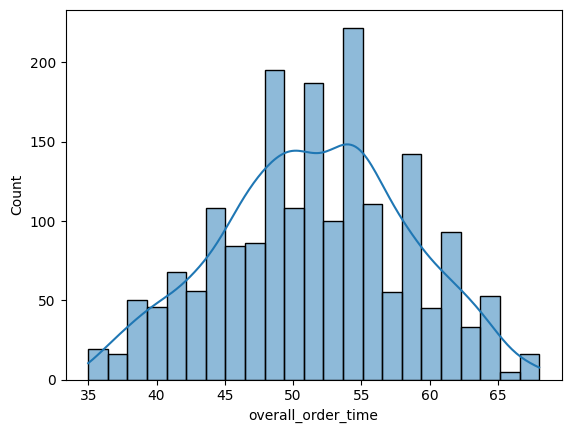

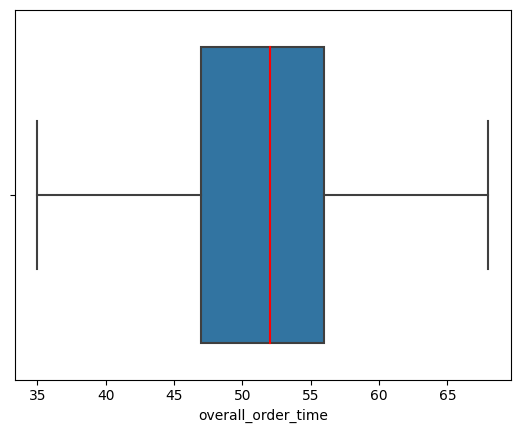

In [ ]:
# Display the distribution of overall_order_time
data = df

sns.histplot(data = data, x = 'overall_order_time', kde = True)

plt.show()

sns.boxplot(data = data, x = 'overall_order_time', medianprops = {'color': 'r'})

plt.show()

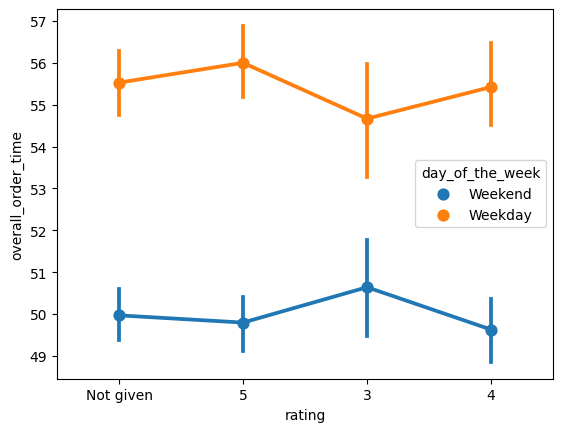

In [ ]:
# Display the distribution of overall_order_time for every rating per day_of_the_week
data = df

ax = sns.pointplot(data = data, y = 'overall_order_time', x = 'rating', hue = 'day_of_the_week')

plt.show()

**Observations:**
* When columns Food Preparation Time and Delivery Time are summed-up, they seem to follow normal distribution as they represent a sharp peak in the middle.
* These columns are slightly symmetrical.
* There are no outliers present in these columns.

##### Observations on Cuisine Type:

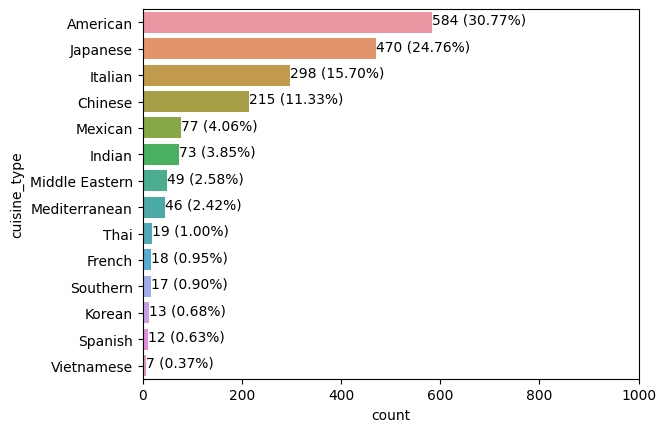

In [ ]:
# Display the number of orders per cuisine_type
data = df
order = data['cuisine_type'].value_counts().index

ax = sns.countplot(data = data, y = 'cuisine_type', order = order)

set_bin_label_ycountplot(ax, data, '.0f', '.2f')

plt.xlim(0, 1000)
plt.show()

**Observations:**
* About 82% of all the orders are made up of only four cuisines: American, Japanese, Italian and Chinese.
* While the Vietnamese, Spanish, Korean, Southern and French cuisines combined, only received less than 5% of the total orders.


##### Observations on Day of the Week:

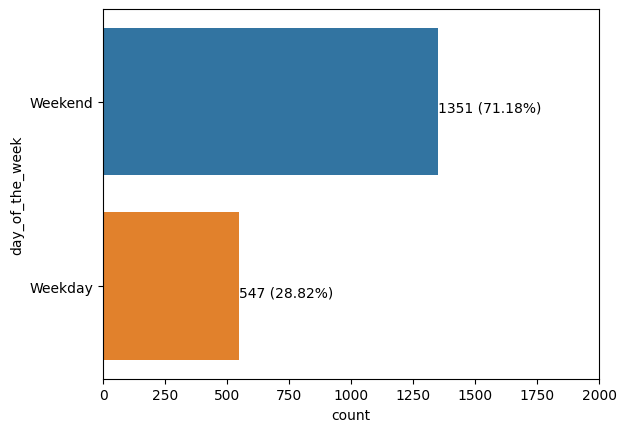

In [ ]:
# Display the number of orders per day_of_the_week
data = df
order = data['day_of_the_week'].value_counts().index

ax = sns.countplot(data = data, y = 'day_of_the_week', order = order)

set_bin_label_ycountplot(ax, data, '.0f', '.2f')

plt.xlim(0, 2000)
plt.show()

**Observations:**
* Weekends received a total of 1,351 orders (or 71.18%) compared to weekdays that only received 547 (or 28.82%).

##### Observations on Rating:

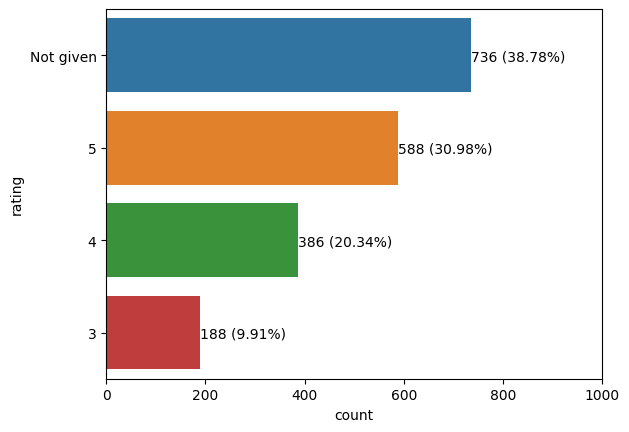

In [ ]:
# Display the number of orders per rating
data = df
order = data['rating'].value_counts().index

ax = sns.countplot(data = data, y = 'rating', order = order)

set_bin_label_ycountplot(ax, data, '.0f', '.2f')

plt.xlim(0, 1000)
plt.show()

In [ ]:
# Create a DataFrame for orders that have been rated
df_wth_rating = df[df['rating'] != 'Not given'].reset_index(drop = True).copy()
df_wth_rating['rating'] = df_wth_rating['rating'].astype(int)

# Create a DataFrame for orders that have not been rated
df_wo_rating = df[df['rating'] == 'Not given'].reset_index(drop = True).copy()
df_wo_rating['rating'] = df_wo_rating['rating'].astype(object)

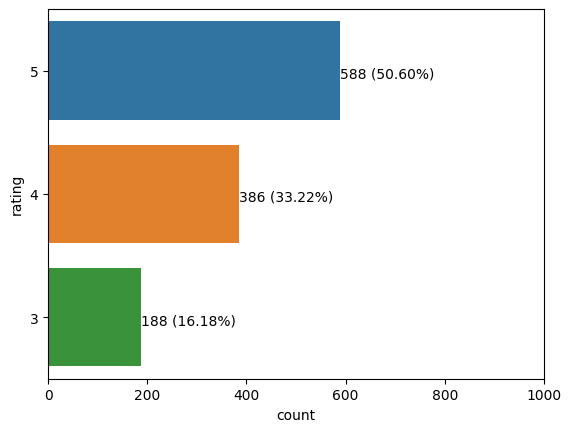

In [ ]:
# Display the number of orders per rating (only for orders that have been rated)
data = df_wth_rating
order = data['rating'].value_counts().index

ax = sns.countplot(data = data, y = 'rating', order = order)

set_bin_label_ycountplot(ax, data, '.0f', '.2f')

plt.xlim(0, 1000)
plt.show()

**Observations:**
* 736 (or 38.78%) of the orders have not been rated by the customers.
* About half of the customers who rated their orders gave 5 rating which indicates that customers are happy with their orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Display the top 5 restaurants with the most orders
top_res_ord = df.groupby(by = 'restaurant_name').size().sort_values(ascending = False).reset_index().rename(columns = {0: 'count'}).head(5)

top_res_ord

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


**Observations:**
* Shake Shack is the most popular restaurant in FoodHub, making 219 (or 11.53%) of the total orders.
* List is followed by:
  * The Meatball Shop (132 or 6.95%)
  * Blue Ribbon Sushi	(119 or 6.27%)
  * Blue Ribbon Fried Chicken	(96 or 5.06%)
  * Parm (68 or 3.58%)

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Display the cuisines that are most popular on weekends
pop_cus_wknd = df[df['day_of_the_week'] == 'Weekend'].groupby(by = 'cuisine_type').size().sort_values(ascending = False).reset_index().rename(columns = {0: 'count'}).head(5)

pop_cus_wknd

,cuisine_type,count
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53


In [ ]:
# Display the cuisine that is most popular on weekends
pop_cus_wknd.head(1)

,cuisine_type,count
0,American,415


**Observations:**
* American cuisine is the most popular cuisine on weekends in FoodHub, making 415 (or 21.87%) of the total orders.
* List is followed by:
  * Japanese (335 or 17.65%)
  * Italian	(207 or 10.91%)
  * Chinese	(163 or 8.59%)
  * Mexican (53 or 2.79%)

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Display the percentage of orders that cost below or greater than 20 dollars
greater_20_pct = df.apply(lambda df: True if df['cost_of_the_order'] > 20 else False, axis = 1).value_counts(normalize = True).mul(100).reset_index().rename(columns = {'index': 'is_cost_greater_20', 0: 'percentage'})

greater_20_pct

,is_cost_greater_20,percentage
0,False,70.758693
1,True,29.241307


In [ ]:
# Display the percentage of orders that cost more than 20 dollars
greater_20_pct[greater_20_pct['is_cost_greater_20'] == True]

,is_cost_greater_20,percentage
1,True,29.241307


**Observations:**
* 29.24% of the orders cost more than 20 dollars.
* While 70.76% of the orders cost less than or equal to 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Display the average order delivery time
df['delivery_time'].mean()

24.161749209694417

**Observations:**
* The average time to deliver the order after it was prepared by the restaurant is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Display the top 3 customers with the most orders
most_freq_cus = df.groupby(by = 'customer_id').size().sort_values(ascending = False).reset_index().rename(columns = {0: 'count'}).head(3)

most_freq_cus

,customer_id,count
0,52832,13
1,47440,10
2,83287,9


**Observations:**
* Customer ID 52832 tops the list with 13 orders.
* Followed by:
  * Customer ID 47440 (10)
  * Customer ID 83287 (9)

### Multivariate Analysis


### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


##### Observations on Numerical Variable Relationships:

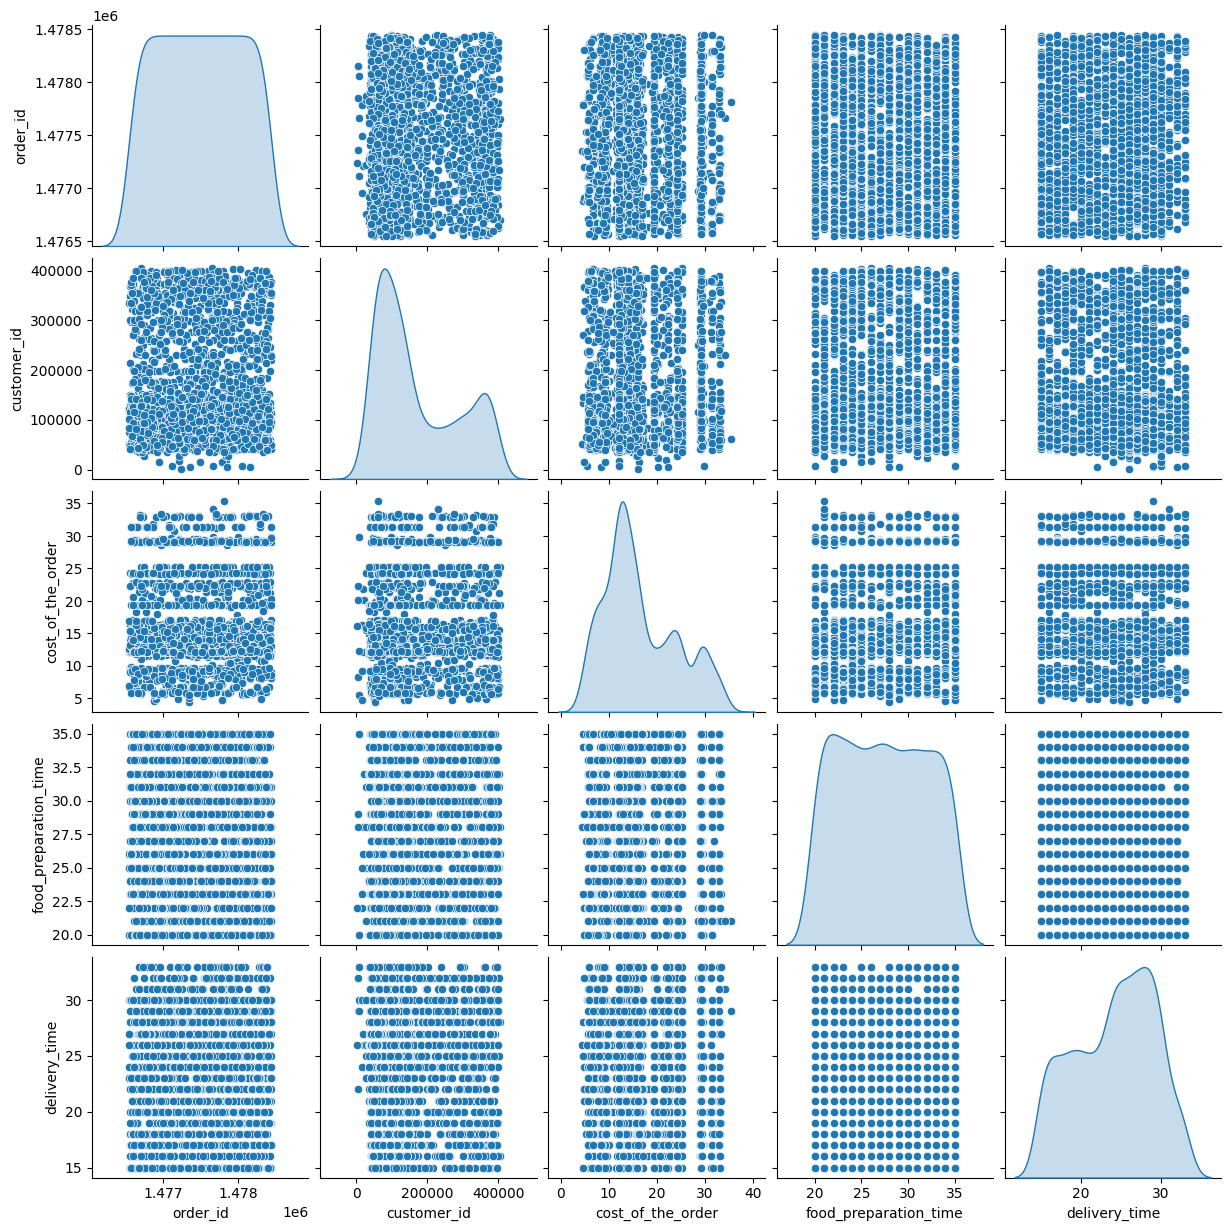

In [ ]:
# Display the relationship of numerical columns (order_id, customer_id, cost_of_the_order, food_preparation_time, delivery_time)
data = df[num_cols]

ax = sns.pairplot(data = data, diag_kind = 'kde')

plt.show()

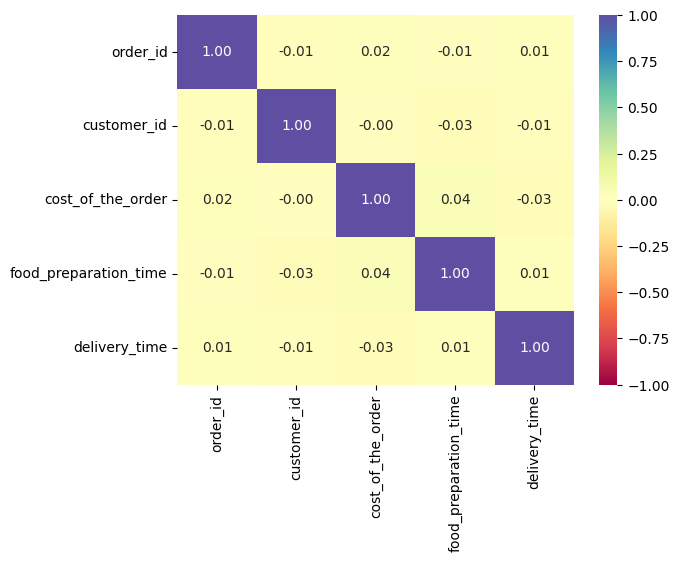

In [ ]:
# Display the relationship of numerical columns (order_id, customer_id, cost_of_the_order, food_preparation_time, delivery_time)
data = df[num_cols].corr()

ax = sns.heatmap(data = data, annot = True, vmin = -1, vmax = 1, fmt = '.2f', cmap = 'Spectral')

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

**Observations:**
* There are no numeric variables that show a relationship.
* There are no numeric variables that show a positive or negative correlation.



##### Observations on Cost of the Order:

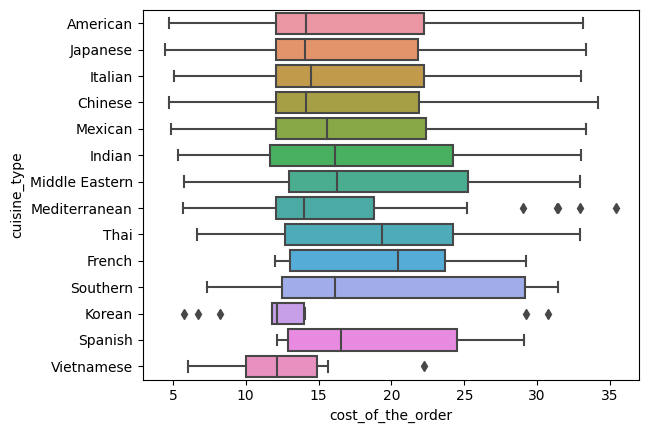

In [ ]:
# Display the distribution of cost_of_the_order per cuisine_type
data = df
order = data['cuisine_type'].value_counts().index

ax = sns.boxplot(data = data, x = 'cost_of_the_order', y = 'cuisine_type', order = order)

plt.show()

**Observations:**
* There are outliers found in the Cost of the Order for the Mediterranean, Korean and Vietnamese cuisines.

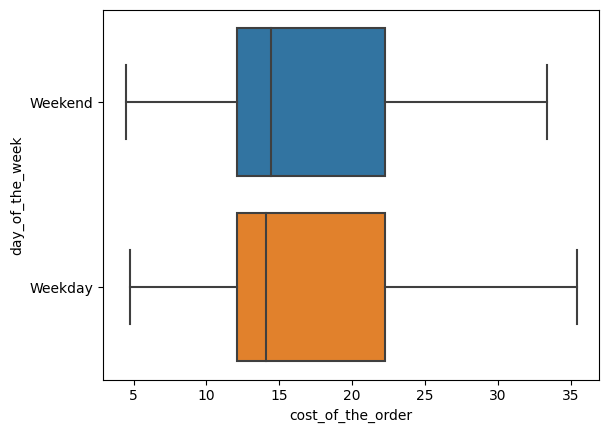

In [ ]:
# Display the distribution of cost_of_the_order per day_of_the_week
data = df
order = data['day_of_the_week'].value_counts().index

ax = sns.boxplot(data = data, x = 'cost_of_the_order', y = 'day_of_the_week', order = order)

plt.show()

**Observations:**
* There are no outliers found in the Cost of the Order irrespective if it is weekday or weekend.


##### Observations on Food Preparation Time:

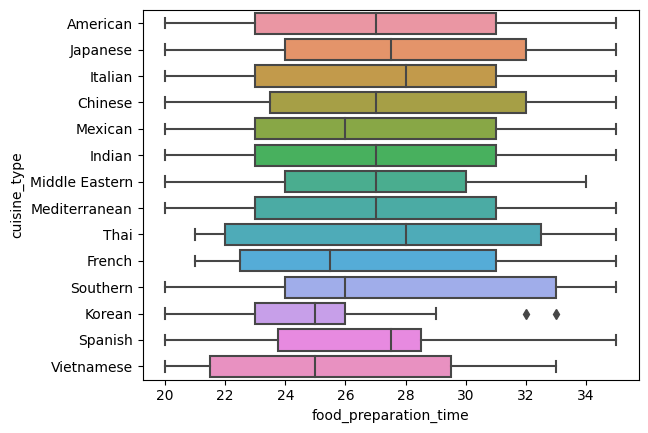

In [ ]:
# Display the distribution of food_preparation_time per cuisine_type
data = df
order = data['cuisine_type'].value_counts().index

ax = sns.boxplot(data = data, x = 'food_preparation_time', y = 'cuisine_type', order = order)

plt.show()

**Observations:**
* There are outliers found in the Food Preparation Time for the Korean cuisine.

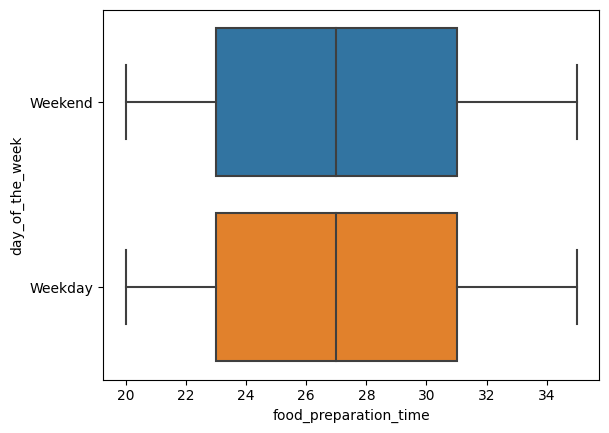

In [ ]:
# Display the distribution of food_preparation_time per day_of_the_week
data = df
order = data['day_of_the_week'].value_counts().index

ax = sns.boxplot(data = data, x = 'food_preparation_time', y = 'day_of_the_week', order = order)

plt.show()

**Observations:**
* There are no outliers found in the Food Preparation Time irrespective if it is weekday or weekend.

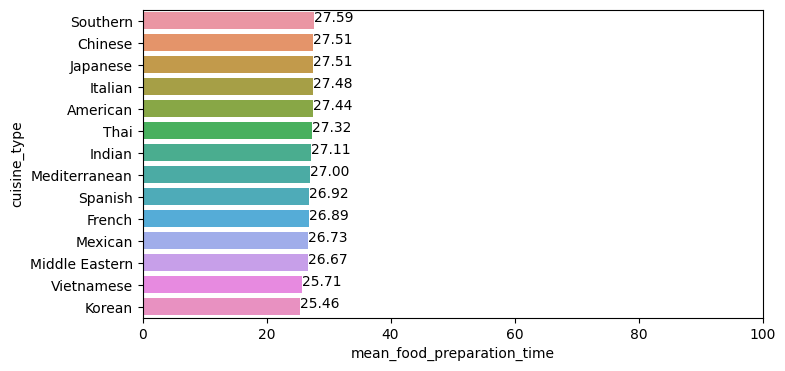

In [ ]:
# Display the average food_preparation_time of orders per cuisine_type
data = df.groupby(by = 'cuisine_type')['food_preparation_time'].mean().reset_index().rename(columns = {'food_preparation_time': 'mean_food_preparation_time'})
order = data.sort_values(by = 'mean_food_preparation_time', ascending = False)['cuisine_type']

plt.figure(figsize = (8, 4))

ax = sns.barplot(data = data, y = 'cuisine_type', x = 'mean_food_preparation_time', order = order)

set_bin_label_ybarplot(ax, data, '.2f')

plt.xlim(0, 100)
plt.show()

**Observations:**
* Southern cuisine takes the longest preparation time in FoodHub.
* List is followed by:
  * Chinese
  * Japanese
  * Italian
  * American

##### Observations on Delivery Time:

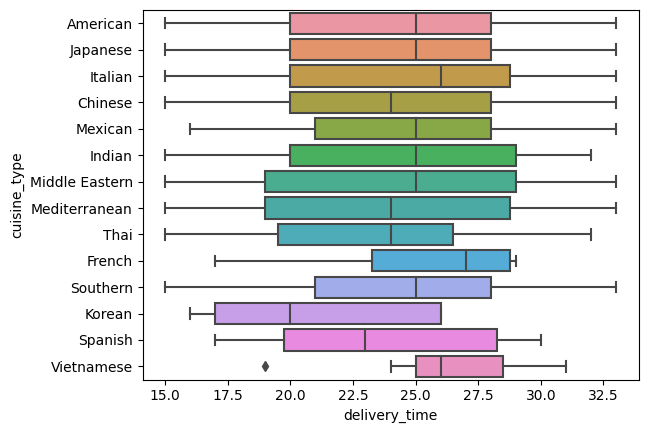

In [ ]:
# Display the distribution of delivery_time per cuisine_type
data = df
order = data['cuisine_type'].value_counts().index

ax = sns.boxplot(data = data, x = 'delivery_time', y = 'cuisine_type', order = order)

plt.show()

**Observations:**
* There are outliers found in the Delivery Time for the Vietnamese cuisine.

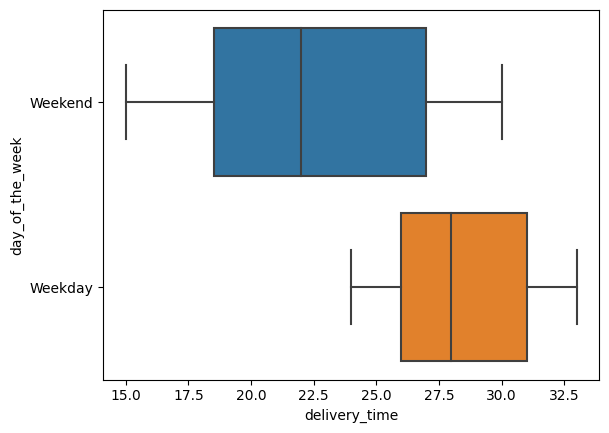

In [ ]:
# Display the distribution of delivery_time per day_of_the_week
data = df
order = data['day_of_the_week'].value_counts().index

ax = sns.boxplot(data = data, x = 'delivery_time', y = 'day_of_the_week', order = order)

plt.show()

**Observations:**
* There are no outliers found in the Delivery Time irrespective if it is weekday or weekend.

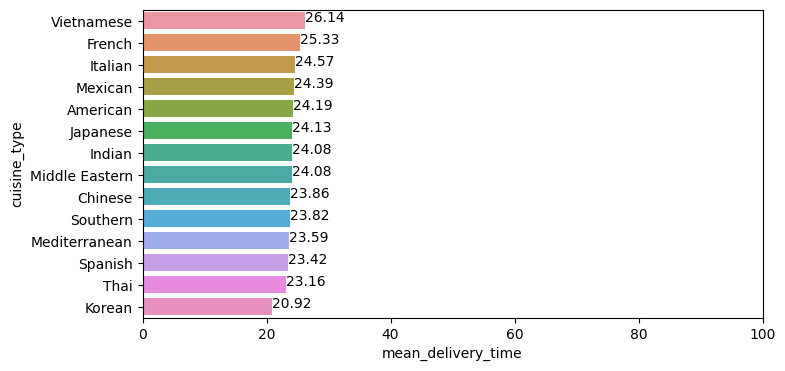

In [ ]:
# Display the average delivery_time of orders per cuisine_type
data = df.groupby(by = 'cuisine_type')['delivery_time'].mean().reset_index().rename(columns = {'delivery_time': 'mean_delivery_time'})
order = data.sort_values(by = 'mean_delivery_time', ascending = False)['cuisine_type']

plt.figure(figsize = (8, 4))

ax = sns.barplot(data = data, y = 'cuisine_type', x = 'mean_delivery_time', order = order)

set_bin_label_ybarplot(ax, data, '.2f')

plt.xlim(0, 100)
plt.show()

**Observations:**
* Vietnamese cuisine takes the longest delivery time in FoodHub.
* List is followed by:
  * French
  * Italian
  * Mexican
  * American

##### Observations on Cuisine Type:

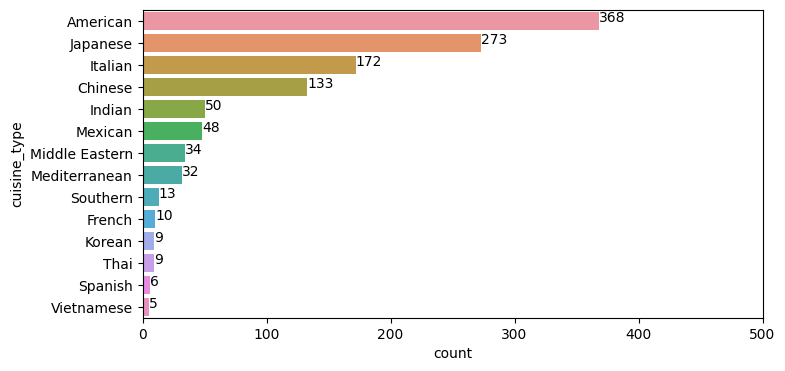

In [ ]:
# Display the number of orders per cuisine_type (only for orders that have been rated)
data = df_wth_rating.groupby(by = 'cuisine_type')['rating'].size().reset_index().rename(columns = {'rating': 'count'})
order = data.sort_values(by = 'count', ascending = False)['cuisine_type']

plt.figure(figsize = (8, 4))

ax = sns.barplot(data = data, y = 'cuisine_type', x = 'count', order = order)

set_bin_label_ybarplot(ax, data, '.0f')

plt.xlim(0, 500)
plt.show()

**Observations:**
* American cuisine is also the most rated cuisine in FoodHub. List is followed by:
  * Japanese
  * Italian
  * Chinese
  * Indian

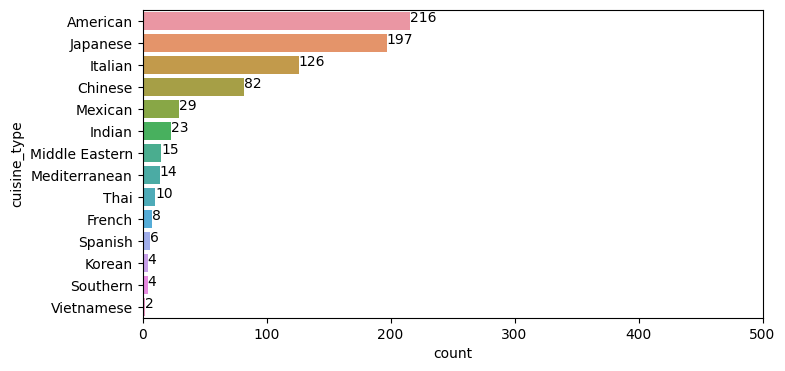

In [ ]:
# Display the number of orders per cuisine_type (only for orders that have not been rated)
data = df_wo_rating.groupby(by = 'cuisine_type')['rating'].size().reset_index().rename(columns = {'rating': 'count'})
order = data.sort_values(by = 'count', ascending = False)['cuisine_type']

plt.figure(figsize = (8, 4))

ax = sns.barplot(data = data, y = 'cuisine_type', x = 'count', order = order)

set_bin_label_ybarplot(ax, data, '.0f')

plt.xlim(0, 500)
plt.show()

**Observations:**
* American cuisine is also the most unrated cuisine in FoodHub. List is followed by:
  * Japanese
  * Italian
  * Chinese
  * Mexican

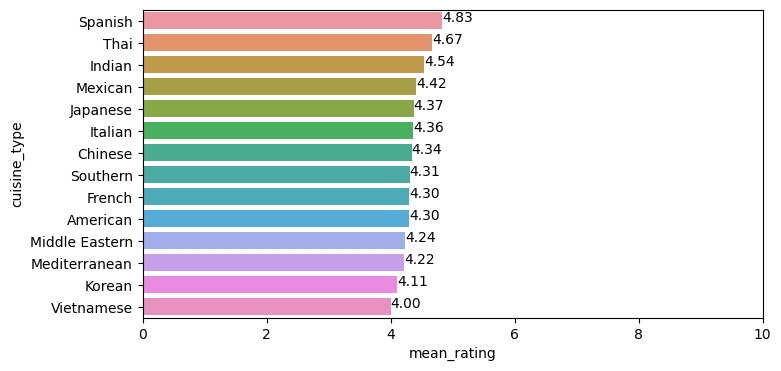

In [ ]:
# Display the average rating of orders per cuisine_type
data = df_wth_rating.groupby(by = 'cuisine_type')['rating'].mean().reset_index().rename(columns = {'rating': 'mean_rating'})
order = data.sort_values(by = 'mean_rating', ascending = False)['cuisine_type']

plt.figure(figsize = (8, 4))

ax = sns.barplot(data = data, y = 'cuisine_type', x = 'mean_rating', order = order)

set_bin_label_ybarplot(ax, data, '.2f')

plt.xlim(0, 10)
plt.show()

**Observations:**
* Spanish cuisine is the most highly rated cuisine in FoodHub. List is followed by:
  * Thai
  * Indian
  * Mexican
  * Japanese

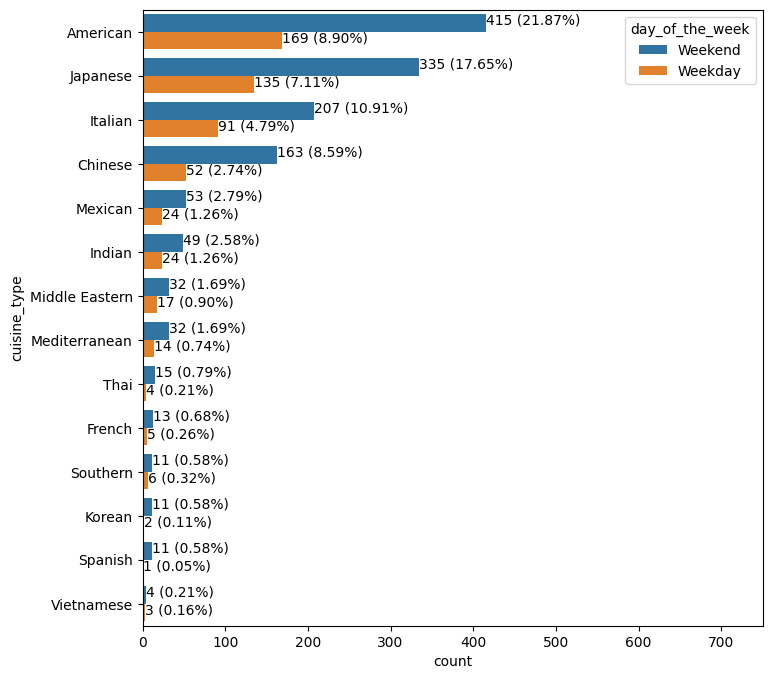

In [ ]:
# Display the number of orders per cuisine_type for each day_of_the_week
data = df
order = data['cuisine_type'].value_counts().index
hue_order = data['day_of_the_week'].value_counts().index

plt.figure(figsize = (8, 8))

ax = sns.countplot(data = data, y = 'cuisine_type', hue = 'day_of_the_week', order = order, hue_order = hue_order)

set_bin_label_ycountplot(ax, data, '.0f', '.2f')

plt.xlim(0, 750)
plt.show()

**Observations:**
* American cuisine is the most ordered cuisine in FoodHub irrespective if it's weekday or weekend. List is followed by:
  * Japanese
  * Italian
  * Chinese
  * Mexican
* It shows consistent popularity in the cuisines irrespective if it's weekday or weekend.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Display the restaurants that have rating count more than 50 and average rating more than 4
res_promo_offer = df_wth_rating.groupby(by = ['cuisine_type', 'restaurant_name']).agg(count = ('rating', 'size'), mean = ('rating', 'mean')).loc[lambda agg: (agg['count'] > 50) & (agg['mean'] > 4)].sort_values(by = 'mean', ascending = False).reset_index()

res_promo_offer

,cuisine_type,restaurant_name,count,mean
0,Italian,The Meatball Shop,70,4.528571
1,American,Blue Ribbon Fried Chicken,64,4.328125
2,American,Shake Shack,133,4.278195
3,Japanese,Blue Ribbon Sushi,73,4.219178


**Observations:**
* Blue Ribbon Fried Chicken (64 and 4.33) and Shake Shack (133 and 4.28) restaurants are both American cuisines that qualifies for the promotion offer. This shows the poularity of American cuisines in New York.
* List also includes: The Meatball Shop (70 and 4.53) and Blue Ribbon Sushi (73 and 4.22) restaurants.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Display the total revenue from all orders
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'revenue'] = df['cost_of_the_order'] * 0.15
df.loc[df['cost_of_the_order'] > 20, 'revenue'] = df['cost_of_the_order'] * 0.25
df.loc[df['cost_of_the_order'] <= 5, 'revenue'] = 0

df['revenue'] = df['revenue'].astype(float)

df['revenue'].sum()

6166.303

**Observations:**
* The net revenue of FoodHub for all orders is 6,166.303 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Display the percentage of orders that take more or less than 60 minutes to get delivered
greater_60_turnover_pct = df.apply(lambda df: True if df['overall_order_time'] > 60 else False, axis = 1).value_counts(normalize = True).mul(100).reset_index().rename(columns = {'index': 'is_overall_order_time_greater_60', 0: 'percentage'})

greater_60_turnover_pct

,is_overall_order_time_greater_60,percentage
0,False,89.462592
1,True,10.537408


In [ ]:
# Display the percentage of orders that take more than 60 minutes to get delivered
greater_60_turnover_pct[greater_60_turnover_pct['is_overall_order_time_greater_60'] == True]

,is_overall_order_time_greater_60,percentage
1,True,10.537408


**Observations:**
* 10.54% of the orders take more than 60 minutes to get prepared and delivered to the customers.
* While 89.46% of the orders take less than or equal to 60 minutes to get prepared and delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Display the average delivery time of orders per day_of_the_week
del_time_mean = df.groupby(by = 'day_of_the_week')['delivery_time'].mean().reset_index().rename(columns = {'delivery_time': 'mean'})

del_time_mean

,day_of_the_week,mean
0,Weekday,28.340037
1,Weekend,22.470022


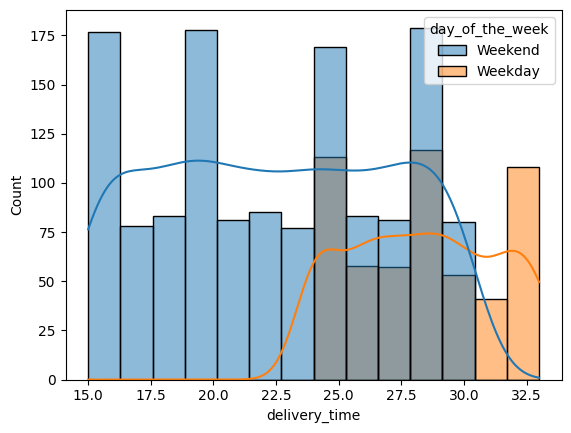

In [ ]:
# Display the distribution of delivery_time per day_of_the_week
data = df
hue_order = data['day_of_the_week'].value_counts().index

sns.histplot(data = data, x = 'delivery_time', hue = 'day_of_the_week', kde = True, hue_order = hue_order)

plt.show()

**Observations:**
* The average delivery time on weekdays is greater than the average delivery time on weekends. This may be due to worse traffic conditions on weekdays than on weekends.



## Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

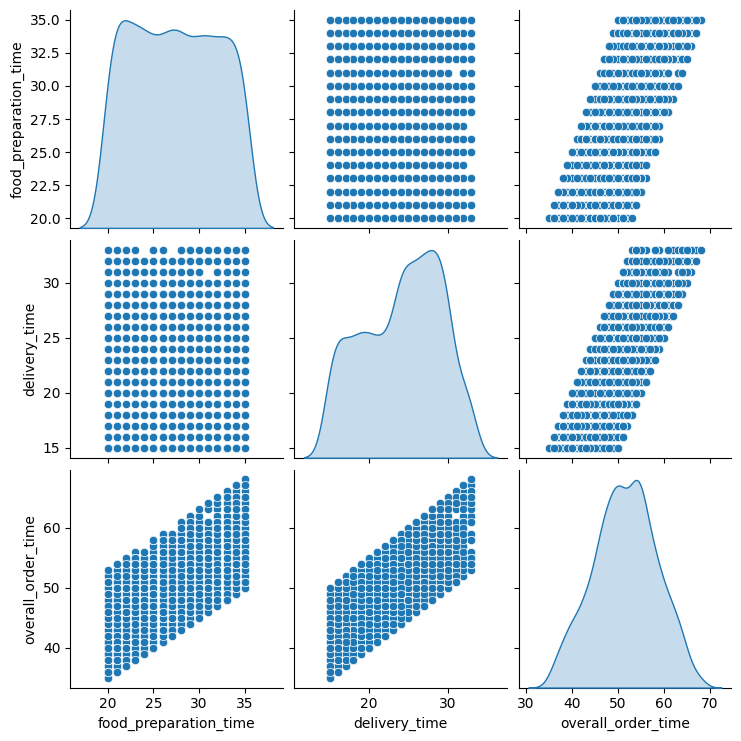

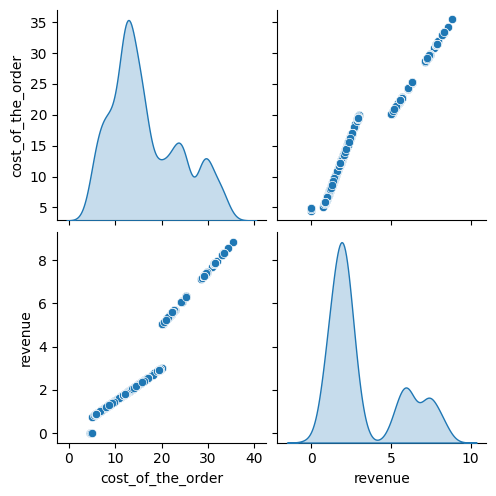

In [ ]:
# Display the relationship of numerical columns with correlations (food_preparation_time, delivery_time, overall_order_time, cost_of_the_order, revenue)
data = df[['food_preparation_time', 'delivery_time', 'overall_order_time']]

ax = sns.pairplot(data = data, diag_kind = 'kde')

plt.show()

data = df[['cost_of_the_order', 'revenue']]

ax = sns.pairplot(data = data, diag_kind = 'kde')

plt.show()

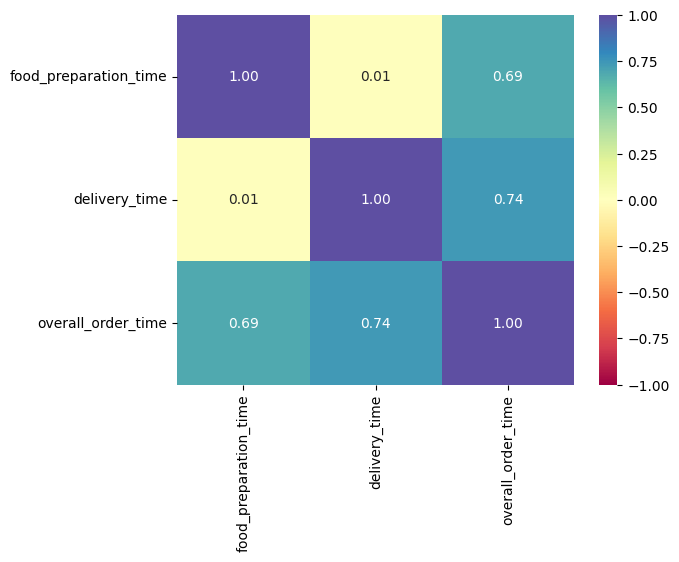

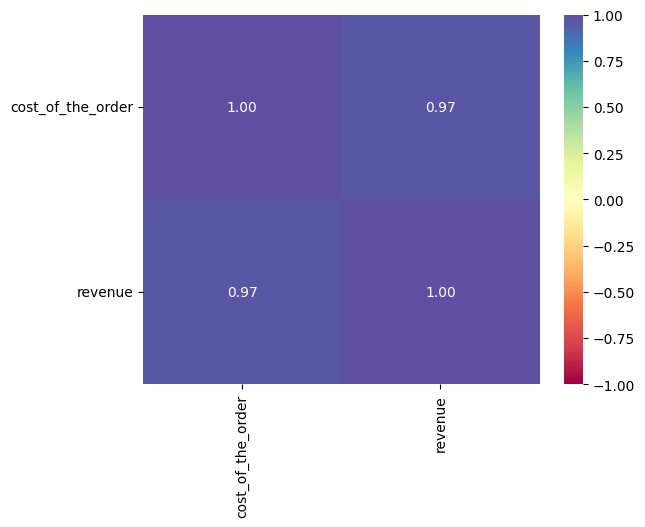

In [ ]:
# Display the relationship of numerical columns with correlations (food_preparation_time, delivery_time, overall_order_time, cost_of_the_order, revenue)
data = df[['food_preparation_time', 'delivery_time', 'overall_order_time']].corr()

ax = sns.heatmap(data = data, annot = True, vmin = -1, vmax = 1, fmt = '.2f', cmap = 'Spectral')

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

data = df[['cost_of_the_order', 'revenue']].corr()

ax = sns.heatmap(data = data, annot = True, vmin = -1, vmax = 1, fmt = '.2f', cmap = 'Spectral')

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

In [ ]:
# Display the revenue for orders greater than 5 dollars and less than or equal to 20 dollars
df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['revenue'].sum()

2477.5755

In [ ]:
# Display the revenue for orders greater than 20 dollars
df[df['cost_of_the_order'] > 20]['revenue'].sum()

3688.7275

### Conclusions:
* About 50% of the customers that rated their orders gave a 5 rating which indicates that customers are happy. However, about 38% of the total orders are not rated, which may greatly impact the result of the ratings.
* About 59.82% (or 3,688.73 dollars) of the revenue of FoodHub comes from orders greater than 20 dollars. This indicates the higher the cost of order by the customer, the bigger the revenue for the FoodHub business.
* Total Order Time is relatively consistent with Food Preparation Time and Delivery Time. This means both Preparation Time and Delivery Time are significant factors for the delivery of the food to the customer.
* There is a consistent popularity of the cuisines regardless if it is weekday or weekend.

### Recommendations:
* Increase the customer rating response to allow a more accurate assessment of orders/ restaurants. If possible, request a follow-up to the customer for orders that are not rated.
* The majority of the revenue of FoodHub comes from orders greater than 20 dollars. If possible, offer promotions to customers to make orders above 20 dollars.
* To reduce the Total Order Time to deliver the food to the customer, a review on how to reduce the Delivery Time will be important since it can reduce the Total Order Time.
* Since there is a consistent popularity of the cuisines regardless if it is weekday or weekend, better marketing can be focused on weekdays to boost the number of orders.